In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img_base_url = "https://yoyoyo-yo.github.io/Gasyori100knock/"

In [46]:
img_orig = io.imread(img_base_url + "dataset/images/imori_256x256.png")

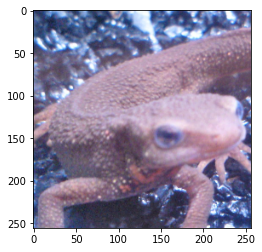

In [4]:
plt.imshow(img_orig)

## Question 1 チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

Python: Ellipsisについて
https://blog.amedama.jp/entry/2016/06/26/230229

In [12]:
def reverse_channel(img):
    return img[..., ::-1]

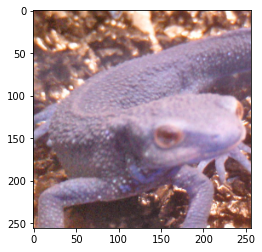

In [13]:
plt.imshow(reverse_channel(img_orig))

## Question 2 グレースケール Grayscale

画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Grayscale = 0.2126 R + 0.7152 G + 0.0722 B

それぞれの係数は人間の視覚の敏感さであり、Gに人間の最も強く反応し、Bにはあまり反応しないことを示す。

In [14]:
def grayscale(img):
    factors = [0.2126, 0.7152, 0.0722]
    _img = img.copy().astype(np.float32)
    gray = _img[..., 0] * factors[0] + _img[..., 1] * factors[1] + _img[..., 2] * factors[2]
    return gray.astype(np.uint8)

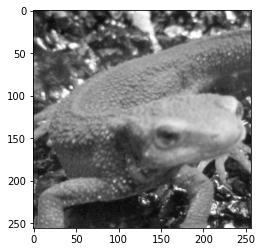

In [15]:
plt.imshow(grayscale(img_orig), cmap='gray')

## Question 3 二値化 Binarization

画像を二値化せよ。 二値化とは、画像を特定の値を閾値として黒と白の二値で表現する方法である。 ここでは、

グレースケール化
閾値を128にして二値化する。

$ y = \begin{cases} 0 & (if , x < th) \\ 255 & (otherwise) \end{cases} $

In [116]:
def bnw(img, th):
    gray = grayscale(img)
    return np.where(gray <= th, 0, 255)

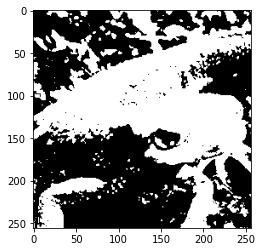

In [117]:
plt.imshow(bnw(img_orig, 127), cmap='gray')

## Question 4 大津の二値化 Otsu's binarization

大津の二値化を実装せよ。 ここでは、

1. グレースケール化
2. 大津の二値化

大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する教師なし手法である。 これはクラス内分散とクラス間分散の比から計算される。

以下原理の説明。

まず、グレースケールの輝度値（ピクセルの値）のヒストグラムはこうなる。ここで赤線を閾値として、左側をクラス0、右側をクラス1として、この二つのクラスがバランスよく分離できれば良い二値化といえる。よって、クラス0と1の分離度を定義する。



In [18]:
img_gray = grayscale(img_orig)

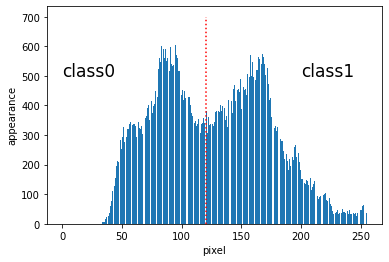

In [19]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.text(0, 500, 'class0', fontsize=17)
plt.text(200, 500, 'class1', fontsize=17)
plt.vlines(120, 0, 700, color='red', linestyles='dotted')
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

![](https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/questions/question_01_10/images/otsu_bin_equ.png?raw=true)

**課題**: $全分散 = クラス間分散 + クラス内分散$を証明せよ

In [159]:
def get_otsu_th(img):
    img = grayscale(img)
    n = img.size
    mean = img.mean()
    var_max = -1
    res = None
    for th in range(0, 256):
        n_1 = img[img <= th].size
        n_2 = img[img > th].size
        mean_1 = img[img <= th].mean()
        mean_2 = img[img > th].mean()
        var_b = (n_1 / n) * ((mean_1 - mean) ** 2) + (n_2 / n) * ((mean_2 - mean)) ** 2
#         var_b = (n_1 * n_2) / (n ** 2) * ((mean_1 - mean_2) ** 2)
        if var_b > var_max:
            var_max = var_b
            res = th
    return res

In [160]:
th = get_otsu_th(img_orig)

<ipython-input-159-8f1f738ac70a>:10: RuntimeWarning: Mean of empty slice.
  mean_1 = img[img <= th].mean()
<ipython-input-159-8f1f738ac70a>:11: RuntimeWarning: Mean of empty slice.
  mean_2 = img[img > th].mean()


In [161]:
th

127

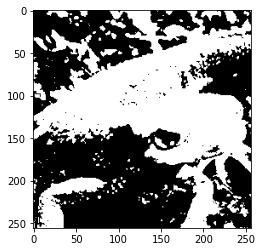

In [162]:
plt.imshow(bnw(img_orig, th), cmap='gray')

In [163]:
img_balloon = cv2.imread("color/Balloon.bmp")

In [164]:
img_balloon = img_balloon[..., ::-1]

In [165]:
th = get_otsu_th(img_balloon)

<ipython-input-159-8f1f738ac70a>:10: RuntimeWarning: Mean of empty slice.
  mean_1 = img[img <= th].mean()
<ipython-input-159-8f1f738ac70a>:11: RuntimeWarning: Mean of empty slice.
  mean_2 = img[img > th].mean()


In [166]:
th

140

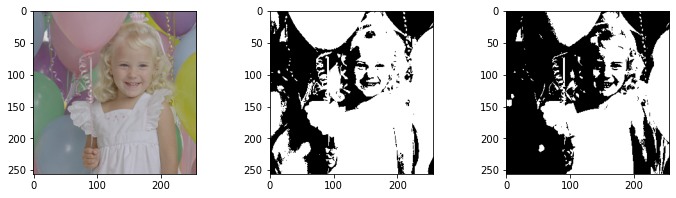

In [180]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_balloon)
plt.subplot(1, 3, 2)
plt.imshow(bnw(img_balloon, 127), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(bnw(img_balloon, th), cmap='gray')

## Question 5 HSV変換 HSV transformation

HSV変換を実装して、色相Hを反転（Hを180度反転）せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

* Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0 <= S < 1)
* Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
* Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 1) 色相は次の色に対応する。

ここでHueをとるのとRGBをとるのは何が違うかというと、色成分をとる時に違う、RGBでは $1678万 = 256^3$次元をとるため、緑を取りたいと思っても、範囲指定が複雑になる（G > 200 としてもRやBが200以上なら見た目が緑とは限らないから）。逆にHueでは360次元で値をとるため、緑の指定が簡単になる。これを上手く活用できれば色成分の抽出が簡単に行えることもある。

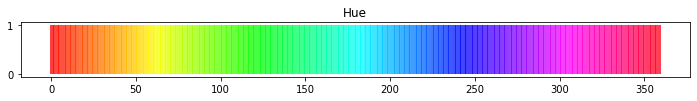

In [173]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

![](https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/questions/question_01_10/images/hsv_equ.png)

注: 上図CはSの誤り

In [575]:
def rgb2hsv(img):
    arr = img.copy().astype(np.float32)
    out = np.zeros_like(arr)
    arr_max = arr.max(axis=-1)
    arr_min = arr.min(axis=-1)
    delta = arr.ptp(axis=-1) # Peak to peak (maximum - minimum) value along a given axis
    ipos = delta > 0
    # blue is min
    idx = (arr[..., 2] == arr_min) & ipos
    out[idx, 0] = 60 + 60 * ((arr[idx, 1] - arr[idx, 0]) / delta[idx])
    # red is min
    idx = (arr[..., 0] == arr_min) & ipos
    out[idx, 0] = 180 + 60 * ((arr[idx, 2] - arr[idx, 1]) / delta[idx])
    # green is min
    idx = (arr[..., 1] == arr_min) & ipos
    out[idx, 0] = 300 + 60 * ((arr[idx, 0] - arr[idx, 2]) / delta[idx])

    out[..., 0] = out[..., 0]
    out[..., 1] = delta
    out[..., 2] = arr_max
    
    return out

In [587]:
def hsv2rgb(hsv):
    h, s, v = np.split(hsv, 3, axis=-1)
    h, s, v = h[..., 0], s[..., 0], v[..., 0]
    _h = h / 60
    x = s * (1 - np.abs(_h % 2 - 1))
    z = np.zeros_like(x)
    vals = np.array([[s, x, z],
                     [x, s, z],
                     [z, s, x],
                     [z, x, s],
                     [x, z, s],
                     [s, z, x]])
                     
    out = np.zeros_like(hsv)
                     
    for i in range(6):
        idx = _h.astype(int) == i
        for j in range(3):
            out[..., j][idx] = (v - s)[idx] + vals[i, j][idx]
    
    return np.clip(out, 0, 255).astype(np.uint8)

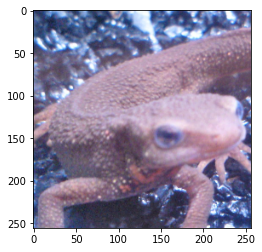

In [589]:
plt.imshow(img_orig)

In [623]:
hsv = rgb2hsv(img_orig)
# Hを反転
hsv[..., 0] = (hsv[..., 0] + 180) % 360

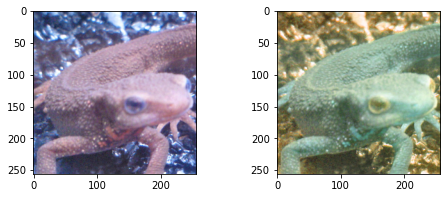

In [624]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.imshow(hsv2rgb(hsv))

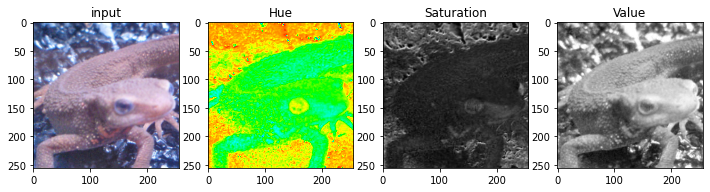

In [631]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0], cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()

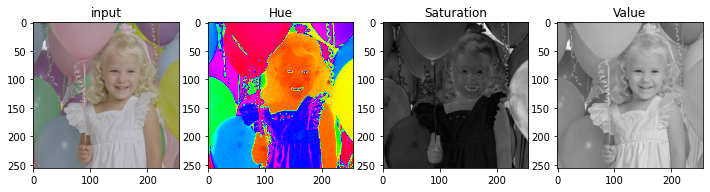

In [634]:
hsv = rgb2hsv(img_balloon)

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img_balloon)

plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0], cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()

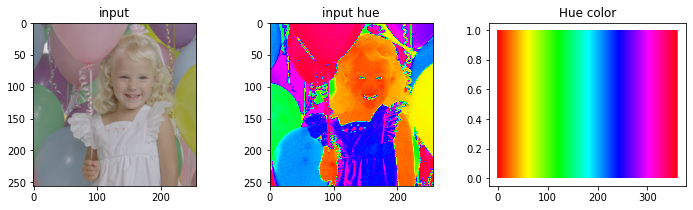

In [635]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_balloon)

plt.subplot(1, 3, 2)
plt.title('input hue')
plt.imshow(hsv[..., 0] / 360, cmap='hsv')

plt.subplot(1, 3, 3)
plt.title('Hue color')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

## Q6 減色 Color subtraction

ここでは画像の値を256^3から4^3、すなわちR,G,B を次式にしたがって{32, 96, 160, 224}の4値に減色せよ。 これは量子化操作である。

$ y = \begin{cases} 32 & ({\rm if} , 0 \leq x < 64) \\ 96& ({\rm else if} , 64 \leq x < 128) \\ 160 & ({\rm else if} , 128 \leq x < 192) \\ 224 & ({\rm else if} , 192 \leq x < 256) \\ \end{cases} $

これで色の複雑さをある程度抑えることができる。味のある画像にもなる。

In [651]:
def color_subtraction(img, div=4):
    th = 256 // div
    return np.clip(img // th * th + th // 2, 0, 255).astype(np.uint8)

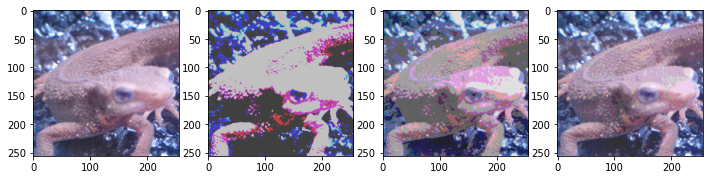

In [679]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(img_orig)
plt.subplot(1, 4, 2)
plt.imshow(color_subtraction(img_orig, 2))
plt.subplot(1, 4, 3)
plt.imshow(color_subtraction(img_orig, 4))
plt.subplot(1, 4, 4)
plt.imshow(color_subtraction(img_orig, 8))
plt.show()

## Q7 平均プーリング Average pooling

ここでは画像をグリッド分割(ある固定長の領域に分ける)し、各領域内(セル)の平均値でその領域内の値を埋める。 このようにグリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる。これらプーリング操作はCNN(Convolutional Neural Network) において重要な役割を持つ。

平均プーリングは次式で定義される。ここでいうRはプーリングを行う領域である。つまり、3x3の領域でプーリングを行う。|R|=3x3=9となる。

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#layer

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f)

In [52]:
def pooling(img, t, kernel_h=3, kernel_w=3):
    # Padding
    h, w = img.shape[0:2]
    top_pad = (h % kernel_h) // 2
    bottom_pad = (h % kernel_h) - top_pad
    left_pad = (w % kernel_w) // 2
    right_pad = (w % kernel_w) - left_pad
    _img = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0)))

    out = np.zeros_like(_img)
    new_h, new_w = _img.shape[0:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    for i in range(kernel_h // 2, new_h - kernel_h // 2 + 1, kernel_h):
        for j in range(kernel_w // 2, new_w - kernel_w // 2 + 1, kernel_w):
            for k in range(c):
                if t == "avg":
                    out[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k] = _img[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k].mean()
                elif t == "max":
                    out[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k] = _img[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k].max()
                else:
                    raise ValueError("Specify type as 'avg' or 'max'.")

    return out[top_pad:h + top_pad, left_pad:w + left_pad]

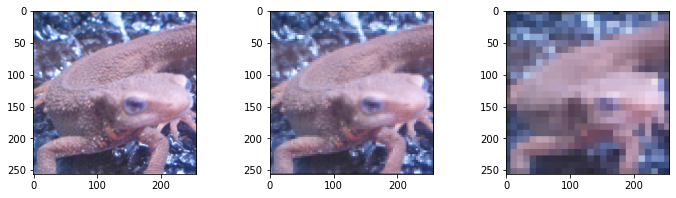

In [51]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.imshow(pooling(img_orig, "avg"))
plt.subplot(1, 3, 3)
plt.imshow(pooling(img_orig, "avg", 10, 10))
plt.show()

## Q8 最大プーリング Max pooling

平均値でなく、最大値を出力せよ。

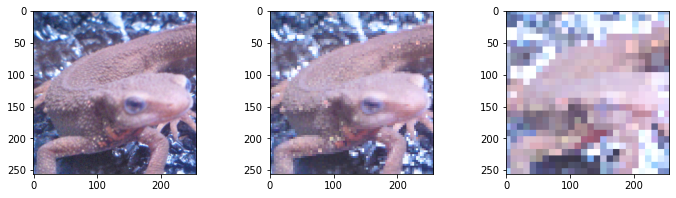

In [53]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.imshow(pooling(img_orig, "max"))
plt.subplot(1, 3, 3)
plt.imshow(pooling(img_orig, "max", 10, 10))
plt.show()

## Q9 ガウシアンフィルタ Gaussian fileter

イモリの画像がノイズだらけになってしまった！これをどうにかしたいので、ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_256x256_noise.pngのノイズを除去せよ。

ガウシアンフィルタとは画像の平滑化（滑らかにする）を行うフィルタの一種であり、ノイズ除去にも使われる。

ノイズ除去には他にも、メディアンフィルタ(Q.10)、平滑化フィルタ(Q.11)、LoGフィルタ(Q.19)などがある。

ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。 このような重みはカーネルやフィルタと呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを0パディングと呼ぶ。かつ、重みは正規化する。(sum g = 1)

重みはガウス分布から次式になる。

$k(x, y) = \frac{1}{2 \pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma ^ 2}}$

例えば$\sigma = 1.3$、カーネルサイズ3の場合は、次式となる。

$ k = \frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} $

In [3]:
img_noise_orig = io.imread(img_base_url + 'dataset/images/imori_256x256_noise.png')

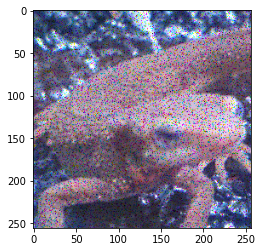

In [4]:
plt.imshow(img_noise_orig)

In [5]:
def gauss(kernel_size, loc, sigma):
    i, j = loc
    h, w = kernel_size
    x = j - w // 2
    y = i - h // 2
    return (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

In [6]:
def gauss_kernel(kernel_size, sigma=1.3):
    h, w = kernel_size
    kernel = np.zeros(kernel_size)
    for i in range(h):
        for j in range(w):
            kernel[i, j] = gauss(kernel_size, (i, j), sigma)

    return kernel / kernel.sum()

In [7]:
import scipy.stats as st

def gauss_kernel_2(kernlen=3, nsig=1.3):
    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [8]:
gauss_kernel((3, 3), 1.3)

array([[0.08941182, 0.12019445, 0.08941182],
       [0.12019445, 0.16157491, 0.12019445],
       [0.08941182, 0.12019445, 0.08941182]])

In [9]:
gauss_kernel_2(3, 1.3)

array([[0.08534898, 0.12144752, 0.08534898],
       [0.12144752, 0.17281401, 0.12144752],
       [0.08534898, 0.12144752, 0.08534898]])

In [42]:
def gaussian_filter(img, kernel_size=(3, 3), sigma=1.3):
    # Padding
    h, w = img.shape[0:2]
    kernel_h, kernel_w = kernel_size
    
    top_pad = int(((kernel_h + 1) / 2))
    bottom_pad = top_pad
    left_pad = int(((kernel_w + 1) / 2))
    right_pad = left_pad
    _img = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0)))

    out = np.zeros_like(_img)
    new_h, new_w = _img.shape[0:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # Get gaussian kernel
    kernel = gauss_kernel(kernel_size, sigma)
    
    for i in range(kernel_h // 2, new_h - kernel_h // 2):
        for j in range(kernel_w // 2, new_w - kernel_w // 2):
            for k in range(c):
                out[i, j, k] = np.sum(_img[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k] * kernel)

    return out[top_pad:top_pad + h, left_pad:left_pad + w].astype(np.uint8)

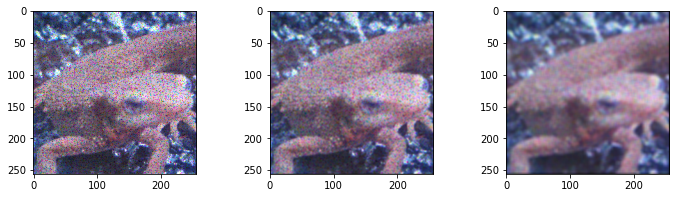

In [43]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_noise_orig)
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filter(img_noise_orig, (3, 3), 1.3))
plt.subplot(1, 3, 3)
plt.imshow(gaussian_filter(img_noise_orig, (7, 7), 3))
plt.show()

$sigma$が広がると、グラフが横広がりになる。つまり、 GaussianFilterでは重みが均一化されるので、Meanフィルタに近付く。

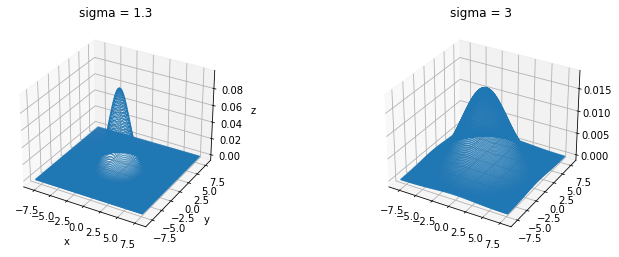

In [877]:
from mpl_toolkits.mplot3d import Axes3D

def gaussian(sigma):
    x = np.arange(-8, 8, 0.1) 
    y = np.arange(-8, 8, 0.1)
    x, y = np.meshgrid(x, y)
    z = 1 / (2 * np.pi * (sigma ** 2)) * np.exp(- (x ** 2 + y ** 2) / (2 * sigma ** 2))
    return x, y, z

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = gaussian(1.3)
ax.scatter3D(x, y, z, s=1, marker='.')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('sigma = 1.3')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = gaussian(3)
ax2.scatter3D(x, y, z, s=1, marker='.')
ax2.set_title('sigma = 3')

plt.show()

## Q10 メディアンフィルタ Median filter

次にメディアンフィルタ(3x3)を実装し、imori_256x256_noise.jpgのノイズを除去せよ。

メディアンフィルタとは画像の平滑化を行うフィルタの一種である。

これは注目画素の3x3の領域内の、メディアン値(中央値)を出力するフィルタである。

In [44]:
def median_filter(img, kernel_size=(3, 3), sigma=1.3):
    # Padding
    h, w = img.shape[0:2]
    kernel_h, kernel_w = kernel_size
    
    top_pad = int(((kernel_h + 1) / 2))
    bottom_pad = top_pad
    left_pad = int(((kernel_w + 1) / 2))
    right_pad = left_pad
    _img = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad), (0, 0)))

    out = np.zeros_like(_img)
    new_h, new_w = _img.shape[0:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    for i in range(kernel_h // 2, new_h - kernel_h // 2):
        for j in range(kernel_w // 2, new_w - kernel_w // 2):
            for k in range(c):
                out[i, j, k] = np.median(_img[i - kernel_h//2:i + kernel_h//2 + 1, j - kernel_w//2:j + kernel_w//2 + 1, k])

    return out[top_pad:top_pad + h, left_pad:left_pad + w].astype(np.uint8)

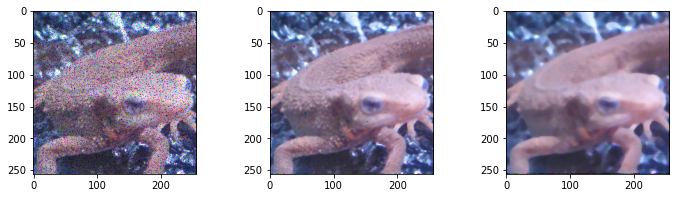

In [55]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(img_noise_orig)
plt.subplot(1, 3, 2)
plt.imshow(median_filter(img_noise_orig, (3, 3)))
plt.subplot(1, 3, 3)
plt.imshow(median_filter(img_noise_orig, (7, 7)))
plt.show()